In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('C:\\Users\\User\\Downloads\\conformal-time-series\\Dataset-SolarTechLab.csv')


In [4]:
df.shape

(525601, 7)

In [7]:
df.to_csv("solar_power.csv",index=False)

In [5]:
df.dropna(inplace=True)

In [6]:
df=df[:2000]

In [4]:
df = pd.read_csv('./datasets/elec2.csv')
df['timestamp'] = pd.date_range(start='1996-5-7', end='1998-12-6 23:30:00', freq='30T', inclusive='both')
df['class'] = (df['class'] == 'UP').astype(float)
df.rename({'nswdemand': 'y'}, axis='columns', inplace=True)
df = df[:2000]
data = df.melt(id_vars=['timestamp'], value_name='target')
data.rename({'variable': 'item_id'}, axis='columns', inplace=True)
data.astype({'target': 'float64'})

,timestamp,item_id,target
0,1996-05-07 00:00:00,date,0.0
1,1996-05-07 00:30:00,date,0.0
2,1996-05-07 01:00:00,date,0.0
3,1996-05-07 01:30:00,date,0.0
4,1996-05-07 02:00:00,date,0.0
...,...,...,...
17995,1996-06-17 13:30:00,class,1.0
17996,1996-06-17 14:00:00,class,1.0
17997,1996-06-17 14:30:00,class,0.0
17998,1996-06-17 15:00:00,class,1.0


In [5]:
df = pd.read_csv('./datasets/daily-climate.csv')
df.rename({'date': 'timestamp', 'meantemp': 'y'}, axis='columns', inplace=True)
df = df.drop("Unnamed: 0", axis='columns')
data = df.melt(id_vars=['timestamp'], value_name='target')
data.rename({'variable': 'item_id'}, axis='columns', inplace=True)

In [6]:
data

,timestamp,item_id,target
0,2013-01-01,y,10.000000
1,2013-01-02,y,7.400000
2,2013-01-03,y,7.166667
3,2013-01-04,y,8.666667
4,2013-01-05,y,6.000000
...,...,...,...
6295,2017-04-20,meanpressure,998.625000
6296,2017-04-21,meanpressure,999.875000
6297,2017-04-22,meanpressure,1001.600000
6298,2017-04-23,meanpressure,1002.125000


In [8]:
df = pd.read_csv('./datasets/solar_power.csv')
df.rename({'Date': 'timestamp'}, axis='columns', inplace=True)
data = df[:2000]
data = data.melt(id_vars=['timestamp'], value_name='target')
data.rename({'variable': 'item_id'}, axis='columns', inplace=True)

In [9]:
data

,timestamp,item_id,target
0,03-01-2017 08:05,y,0.862305
1,03-01-2017 08:06,y,0.862305
2,03-01-2017 08:07,y,0.844879
3,03-01-2017 08:11,y,0.844879
4,03-01-2017 08:12,y,0.844879
...,...,...,...
11995,09-01-2017 13:45,W_d,185.700000
11996,09-01-2017 13:46,W_d,141.900000
11997,09-01-2017 13:47,W_d,194.500000
11998,09-01-2017 13:48,W_d,103.400000


In [10]:

data = data.pivot(columns="item_id", index="timestamp", values="target")
data['y'] = data['y'].astype(float)
data = data.interpolate()
data.index = pd.to_datetime(data.index)

In [11]:
data

item_id,G_h,G_tilt,T_air,W_d,W_s,y
timestamp,,,,,,
2017-03-01 08:05:00,2.0,3.0,0.63,318.8,0.25,0.862305
2017-03-01 08:06:00,2.0,4.0,0.73,309.3,0.00,0.862305
2017-03-01 08:07:00,3.0,4.0,0.88,330.1,0.30,0.844879
2017-03-01 08:11:00,7.0,9.0,0.03,11.8,1.11,0.844879
2017-03-01 08:12:00,7.0,11.0,-0.39,24.1,0.84,0.844879
...,...,...,...,...,...,...
2017-09-01 13:45:00,338.0,618.0,4.26,185.7,0.58,145.154480
2017-09-01 13:46:00,334.0,613.0,4.55,141.9,0.63,145.154480
2017-09-01 13:47:00,333.0,610.0,4.71,194.5,0.41,142.777100


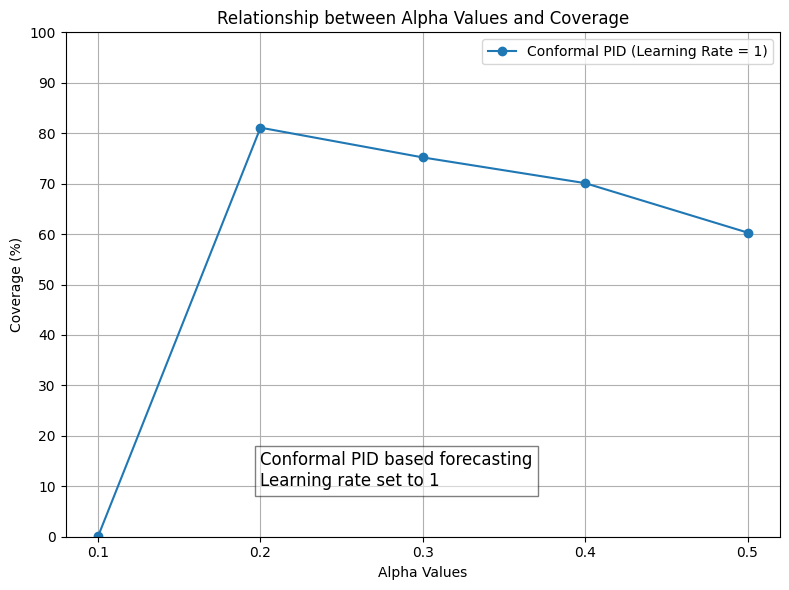

In [9]:
import matplotlib.pyplot as plt

# Alpha values and corresponding coverage values
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5]
coverage_values = [90.1, 81.1, 75.2, 70.1, 60.3]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, coverage_values, marker='o', linestyle='-', label='Conformal PID (Learning Rate = 1)')
plt.title('Relationship between Alpha Values and Coverage')
plt.xlabel('Alpha Values')
plt.ylabel('Coverage (%)')
plt.grid(True)
plt.xticks(alpha_values)  # Ensure alpha values are displayed on x-axis
plt.yticks(range(0, 101, 10))  # Set y-axis ticks from 0 to 100 with a step of 10
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.legend()  # Show legend
plt.text(0.2, 10, 'Conformal PID based forecasting\nLearning rate set to 1', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))  # Add text annotation
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
